# Lululemon: Men's Running Clothing 

In [256]:
import pandas as pd
import plotly.figure_factory as ff
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
import re
import nltk

In [257]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='aromerony', api_key='fiXSf2viVHJtMEz1akU2')

In [258]:
df = pd.read_csv('../lululemonSelenium/men/lululemon_final.csv')
pd.options.display.max_colwidth = 100

In [259]:
df = df.drop(df.columns[0], axis=1)

# Category/Category Types Analysis

### How are ratings spread over category types?

In [260]:
catType = df_reviews.groupby('categoryType')['product'].count().reset_index().sort_values('product', ascending = False).reset_index(drop=True)
catType = catType.rename(columns={'categoryType':'Category Type', 'product':'Total Count'})
catType

,Category Type,Total Count
0,shorts,667
1,long sleeve,497
2,short sleeve,366
3,tank,73
4,water bottle,61
5,jogger,51
6,hat,39
7,tights,25
8,socks + underwear,22
9,jackets + coats,5


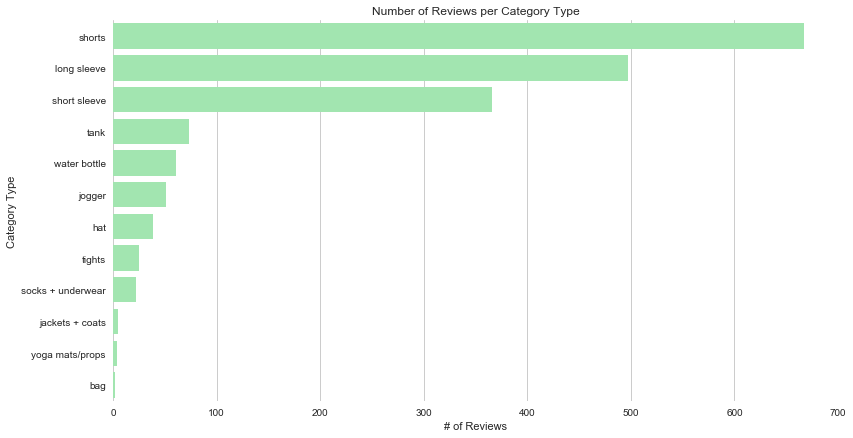

In [431]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))

# Plot the total reviews per category type
sns.set_color_codes("pastel")
sns.barplot(x = 'Total Count', y='Category Type', data=catType, color="g")

# Add an informative axis label
ax.set(ylabel="Category Type", title='Number of Reviews per Category Type',
       xlabel="# of Reviews")
sns.despine(left=True, bottom=True)

## Category Types and Average Rating

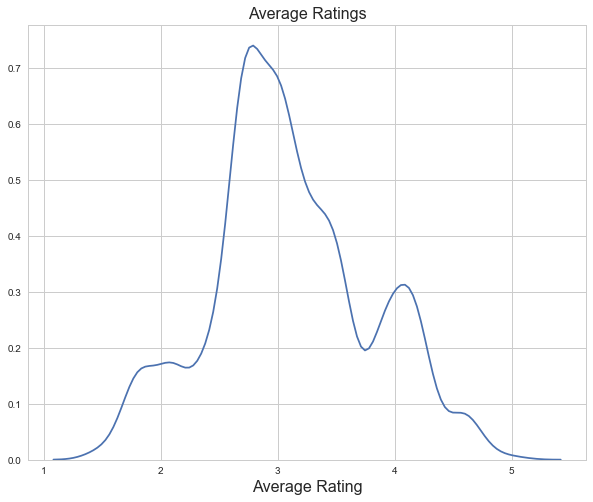

In [262]:
plt.figure(figsize=(10,8))
sns.distplot(df['average_rating'], hist = False)
plt.title("Average Ratings", fontsize=16)
plt.xlabel("Average Rating", fontsize=16)
plt.show();

### What is the max number of ratings people gave?

In [270]:
cnt_srs = df['user_rating'].value_counts().head()
trace = go.Bar(
    y=cnt_srs.index[::-1],
    x=cnt_srs.values[::-1],
    orientation = 'h',
    marker=dict(
        color=cnt_srs.values[::-1],
        colorscale = 'Blues',
        reversescale = True
    ),
)

layout = dict(
    title='Ratings Distribution',
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Ratings")

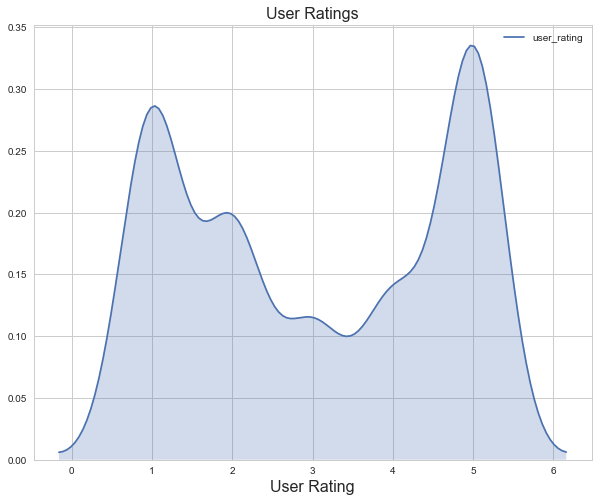

In [271]:
plt.figure(figsize=(10,8))
sns.kdeplot(df['user_rating'], shade=True)
plt.title("User Ratings", fontsize=16)
plt.xlabel("User Rating", fontsize=16)
plt.show();

## Number of Responses by User Rating

In [273]:
response_user_rating = df.groupby('user_rating')['response'].count().reset_index().sort_values('response', ascending = False).reset_index(drop=True)
response_user_rating = response_user_rating.rename(columns={'user_rating':'User Rating', 'response':'Total Responses'})
response_user_rating

,User Rating,Total Responses
0,1.0,357
1,2.0,224
2,3.0,108
3,4.0,47
4,5.0,8


## The most amount of responses come from ratings of 1-3; 4's and 5's get the lowest amount of responses.

### What is going with these eight 5's that get responses?

In [275]:
fives = df[df['user_rating'] == 5.0]
fives[~fives['response'].isnull()]

,product,list_price,average_rating,user_rating,user,location,athleticType,ageRange,bodyType,like,...,text,responseDate,response,helpfulYes,helpfulNo,date_Published,gender,category,categoryType,text length
286,"Pace Breaker Short Linerless 9"" Updated",68,4.1,5.0,HOCKEYPLAYER9,"PHILADELPHIA, PA, USA",SWEATY GENERALIST,18-24,ATHLETIC,"the liner, the materials",...,These shorts are fantastic!! I've been wearing the same five or six pairs to the gym and casuall...,2017-04-13,"Hey hockeyplayer9,\nThanks for taking the time to share your thoughts with us today. We love tha...",1,0,2017-04-13,male,bottom,shorts,667
306,Lightspeed Run Hat,38,4.3,5.0,KRF110,NaN,NaN,NaN,NaN,"the strap, simple design, properly fits your head",...,The hat is incredibly light and the strap is amazing. I own a black one with no design and its p...,2016-07-21,"Hey krf110,\nThanks for taking the time to share your feedback about your Light-speed Run Hat. W...",0,0,2016-07-21,male,accessory,hat,280
460,"Pace Breaker Short 9"" Updated",68,1.8,5.0,ANDY123,OTTAWA,CYCLIST,55-65,ATHLETIC,"style, tapered, liner",...,"I love this upgrade. The liner is very comfortable and supports well. However, I am not convince...",2018-07-21,"Hey BringBack,\n\nThank you for taking the time to share your feedback with us. It’s a bummer to...",3,0,2018-07-09,male,bottom,shorts,419
842,"Pace Breaker Short 9""",68,3.5,5.0,JEARBEAR,"KANSAS CITY, MO",SWEATY GENERALIST,35-44,ATHLETIC,great for crossfit and running,...,"I now have 3 pairs of pace breakers, having bought my 3rd pair last month. Having owned the firs...",2016-08-26,"Hey JearBear,\nThanks for taking the time to share your feedback about your Pace Breaker Short 9...",3,0,2016-08-26,male,bottom,shorts,464
1138,"Surge Short 7""",68,3.3,5.0,GENE,NaN,RUNNER,25-34,MUSCULAR,NaN,...,Absolutely the best running shorts around hands down. BUT i noticed mine are falling apart only ...,2015-01-17,"Hi Gene,\nThanks for reaching out. You shouldn't be experiencing this with your Surge Short 7"". ...",0,0,2015-01-17,male,bottom,shorts,264
1167,"Surge Short Light 7""",68,2.6,5.0,RUNEVERYDAY40,"FAYETTEVILLE, AR, USA",RUNNER,35-44,ATHLETIC,NaN,...,"I purchased 4 pairs of lulu shorts for my husband, and the surge short is his favorite pair. He ...",2016-06-06,"Hi Runeveryday40,\nThanks for taking the time to reach out and share your husbands experience wi...",2,0,2016-06-05,male,bottom,shorts,196
1228,"Pace Breaker Short 9"" Linerless",68,4.1,5.0,HOCKEYPLAYER9,"PHILADELPHIA, PA, USA",SWEATY GENERALIST,18-24,ATHLETIC,"the liner, the materials",...,These shorts are fantastic!! I've been wearing the same five or six pairs to the gym and casuall...,2017-04-13,"Hey hockeyplayer9,\nThanks for taking the time to share your thoughts with us today. We love tha...",1,0,2017-04-13,male,bottom,shorts,667
1260,"Pace Breaker Short 9"" Updated",68,1.8,5.0,ANDY123,OTTAWA,CYCLIST,55-65,ATHLETIC,"style, tapered, liner",...,"I love this upgrade. The liner is very comfortable and supports well. However, I am not convince...",2018-07-21,"Hey BringBack,\n\nThank you for taking the time to share your feedback with us. It’s a bummer to...",3,0,2018-07-09,male,bottom,shorts,419


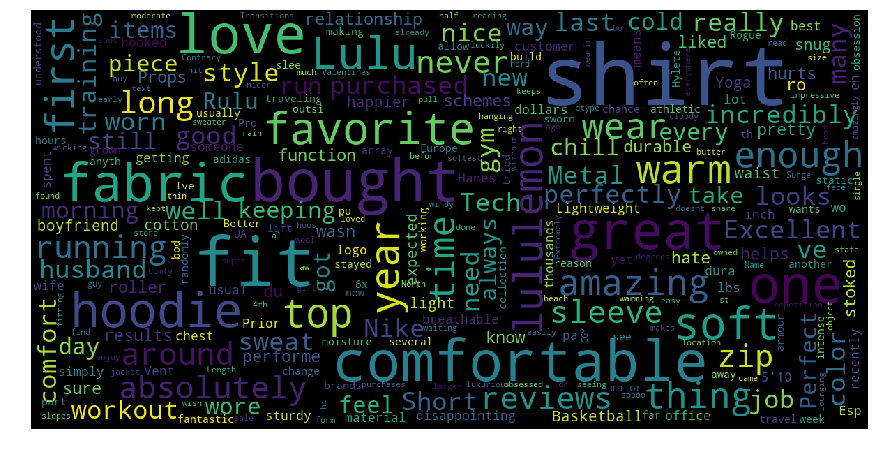

In [280]:
show_wordcloud(fives['text'])

## Are these 5's that get a response much different from the rest of the reviews?

In [284]:
ones_twos = df[(df.user_rating == 1.0) | (df.user_rating == 2.0)]
ones_twos[~ones_twos_threes['response'].isnull()]

,product,list_price,average_rating,user_rating,user,location,athleticType,ageRange,bodyType,like,...,text,responseDate,response,helpfulYes,helpfulNo,date_Published,gender,category,categoryType,text length
5,Metal Vent Tech Short Sleeve,68,2.7,1.0,JKIM,"BOSTON, MA, USA",SWEATY GENERALIST,18-24,ATHLETIC,NaN,...,"The metal vent tech short sleeve was a perfect fit for me when I first got it, but it shrunk alm...",2018-08-06,"Hey Jkim,\n\nThanks for taking the time to share your feedback with us. I'm sorry to hear your M...",0,0,2018-08-05,male,top,short sleeve,216
7,Metal Vent Tech Short Sleeve,68,2.7,2.0,SOLECATALYST,NaN,NaN,NaN,NaN,NaN,...,I initially liked this shirt as it is very comfortable and fits extremely well. It's fitted but ...,2018-08-04,"Hey SoleCatalyst,\n\nWe're sorry to read of your recent experience and would love to discuss thi...",0,0,2018-08-03,male,top,short sleeve,520
15,Metal Vent Tech Short Sleeve,68,2.7,2.0,RUN98,AUSTIN,RUNNER,18-24,ATHLETIC,"design, material",...,The material and design of the shirt are great and I've been using them for years. They move wit...,2018-07-31,"Dear run98,\n\nThanks for reaching out and providing this feedback for us. We stand behind the q...",0,0,2018-07-28,male,top,short sleeve,379
17,Metal Vent Tech Short Sleeve,68,2.7,2.0,CG22KU,ST. LOUIS,CYCLIST,18-24,LEAN,NaN,...,"I love Lululemon and wear it almost every day, however the red metal vent tech short sleeve has ...",2018-07-29,"Hi cg22ku,\n\nThank you for taking the time to share your feedback with us. We are sorry to hear...",0,0,2018-07-28,male,top,short sleeve,373
18,Metal Vent Tech Short Sleeve,68,2.7,2.0,KRNROO,NaN,NaN,NaN,NaN,NaN,...,after two washes the shirt has stretched out to the point where it's unwearable. lululemon pride...,2018-07-23,"Hi Krnroo,\nWe're sorry to read of your recent experience and would love to discuss this further...",0,0,2018-07-23,male,top,short sleeve,236
20,Metal Vent Tech Short Sleeve,68,2.7,2.0,ELCAPTAIN24,"NEW YORK, NY, USA",SWEATY GENERALIST,25-34,ATHLETIC,"feel, colors, soft",...,"I own a few of these shirts. I love the silverescent material and feel of the shirts, however on...",2018-07-13,"Hi ElCaptain24,\nThanks for taking the time to share this feedback. It's not good to hear that o...",0,0,2018-07-12,male,top,short sleeve,431
22,Metal Vent Tech Short Sleeve,68,2.7,2.0,WRINKLY,"CHICAGO, IL, USA",RUNNER,25-34,ATHLETIC,NaN,...,"I love lulu lemon. It is my main apparel for working out. That being said, I was extremely disap...",2018-07-05,"Hey Wrinkly,\n\nThanks for taking the time to pass along some feedback on the Metal Vent Tech Sh...",0,0,2018-07-04,male,top,short sleeve,411
24,Metal Vent Tech Short Sleeve,68,2.7,1.0,THEBOMBA,"SPOKANE, WA",YOGI,45-54,NaN,colors,...,I have recently gotten into hot yoga and after struggling with regular gym shorts that go beyond...,2018-06-19,"Hey thebomba,\n\nThank you for taking the time to review the Metal Vent Tech Short Sleeve. We wa...",0,0,2018-06-18,male,top,short sleeve,600
27,Metal Vent Tech Short Sleeve,68,2.7,2.0,AFC2004,NaN,NaN,NaN,NaN,"fit(at first), style",...,"I purchased the nautical navy colorway and it was good at first. After only a few wears, I notic...",2018-05-14,"Hi AFC2004,\nThank you for taking the time to share your feedback with us. We're sorry to read o...",0,0,2018-05-13,male,top,short sleeve,290
30,Metal Vent Tech Short Sleeve,68,2.7,1.0,ATLAS101,NaN,NaN,NaN,NaN,NaN,...,I really had high hopes for this shirt. Super comfortable and fit perfectly the first few times ...,2018-07-01,"Hey Christianisaacg,\nIt sounds like you know how to take care of your gear, so this shouldn't b...",0,0,2018-05-02,male,top,short sleeve,279


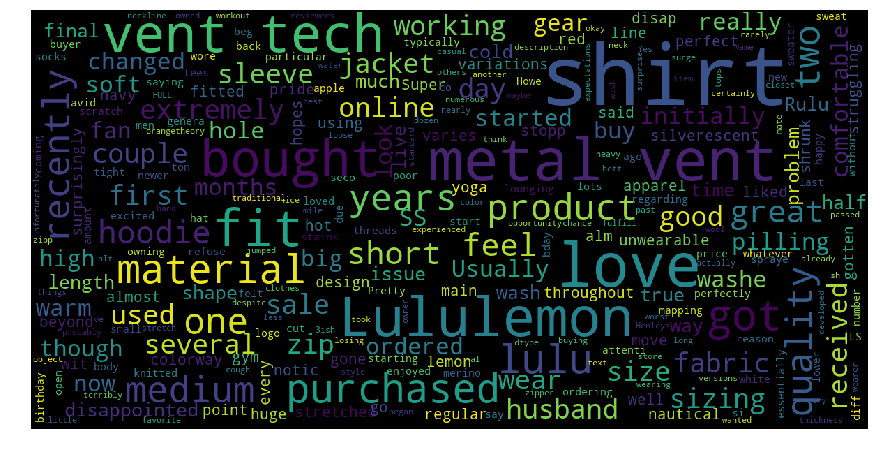

In [285]:
show_wordcloud(ones_twos['text'])

### Number of Ratings by Athletic Type

In [286]:
bodyType_prod = df.groupby('bodyType')['product'].count().reset_index().sort_values('product', ascending = False).reset_index(drop = True)
bodyType_prod

,bodyType,product
0,ATHLETIC,907
1,MUSCULAR,231
2,LEAN,163
3,SLIM,106
4,SOLID,64
5,PETITE,28
6,CURVY,20


### WHO ARE THESE CURVY MEN?!

In [287]:
df[df['bodyType'] == 'CURVY'].groupby('athleticType')['product'].count().reset_index().sort_values('product', ascending = False).reset_index(drop = True)
# Ew, sweaty generalist.

,athleticType,product
0,SWEATY GENERALIST,11
1,RUNNER,5
2,YOGI,3
3,DANCER,1


In [455]:
df[df['bodyType'] == 'CURVY'][['product']].groupby('product')['product'].count()

product
Metal Vent Tech Headband                   1
Metal Vent Tech Long Sleeve Henley         1
Pace Breaker Short 9"                      1
Pace Breaker Short 9" Linerless            2
Pace Breaker Short 9" Updated              2
Pace Breaker Short Linerless 9" Updated    2
Purist Cycling Water Bottle 26 oz          9
Surge Jogger 29"                           1
Surge Short Linerless 7"                   1
Name: product, dtype: int64

In [289]:
df[df['bodyType'] == 'ATHLETIC'].groupby('athleticType')['product'].count().reset_index().sort_values('product', ascending = False).reset_index(drop = True)

,athleticType,product
0,SWEATY GENERALIST,501
1,RUNNER,274
2,YOGI,55
3,CYCLIST,22
4,DANCER,4


In [290]:
df[df['bodyType'] == 'ATHLETIC'].sample(10)

,product,list_price,average_rating,user_rating,user,location,athleticType,ageRange,bodyType,like,...,text,responseDate,response,helpfulYes,helpfulNo,date_Published,gender,category,categoryType,text length
1045,"Surge Short Online Only 5""",68,4.2,5.0,TC2491,"ATLANTA, GA, USA",SWEATY GENERALIST,25-34,ATHLETIC,NaN,...,This is my first pair of lululemon shorts because I had never seen anything shorter than 7 inche...,NaN,NaN,0,0,2016-06-06,male,bottom,shorts,213
1275,"Pace Breaker Short 9"" Updated",68,1.8,1.0,ANSIBLE,"SAN FRANCISCO, CA, USA",SWEATY GENERALIST,25-34,ATHLETIC,NaN,...,"I have had dozens of Pace Breaker shorts. I even had their predecessors, the Response shorts. So...",2018-06-08,"Dear Ansible,\n\nThanks for making time to leave a review. We're sorry to read of your recent ex...",3,0,2018-06-08,male,bottom,shorts,197
707,"Surge Light 3/4 Tight 23""",88,3.9,2.0,RUNLIFT202,"CHICAGO, IL",RUNNER,25-34,ATHLETIC,NaN,...,I am a Lulu enthusiast and i've been waiting for men's tights. I got these 3/4 and the full surg...,2018-04-12,"Hi Runlift202,\n\nWe stand behind the quality of our product and want to ensure that your gear i...",0,0,2018-04-11,male,bottom,tights,489
1415,Metal Vent Tech Short Sleeve,68,2.7,2.0,THEJUGGLER1,NaN,SWEATY GENERALIST,35-44,ATHLETIC,fit,...,Got two of these for my birthday and was initially happy with the fit. Bought them for lounging ...,2018-03-19,"Hi thejuggler1,\nWe appreciate your feedback regarding the Metal Vent Tech Short Sleeve. We want...",0,0,2018-03-19,male,top,short sleeve,401
437,Metal Vent Tech Surge Short Sleeve,78,2.4,1.0,HG105,NEW YORK,RUNNER,18-24,ATHLETIC,"comfort, breathability",...,I love this shirt. Its super comfortable and allows my body to breathe. Almost to the point wher...,2017-09-01,"Hey HG105,\nThanks so much for sharing your thoughts today. We stand behind the quality of our g...",11,0,2017-08-31,male,top,short sleeve,362
846,"Pace Breaker Short 9""",68,3.5,4.0,BOOSER,"CHICAGO, IL",SWEATY GENERALIST,45-54,ATHLETIC,full boxer brief,...,"I have about 8 pairs of these shorts. they are fantastic given they can be used for running, lif...",2016-07-26,"Hey there Booser,\nThanks for reaching out and letting us know your feedback. I'm sorry to hear ...",3,0,2016-07-26,male,bottom,shorts,502
782,"Pace Breaker Short 9""",68,3.5,2.0,RUNNER121,NaN,RUNNER,18-24,ATHLETIC,NaN,...,"I own a lot of lululemon that has lasted awhile, but these shorts are disappointing due the hole...",2017-08-22,"Hey runner121,\nSorry to hear that your Pace Breaker Short 9"" isn't holding up as expected. We s...",2,0,2017-08-21,male,bottom,shorts,264
453,"Pace Breaker Short 9"" Updated",68,1.8,1.0,REALHORN55,"AUSTIN, TX, USA",SWEATY GENERALIST,25-34,ATHLETIC,available in white,...,loved the prior version of these shorts. the new liner is SO UNCOMFORTABLE in so many ways. Don'...,NaN,NaN,3,0,2018-07-16,male,bottom,shorts,120
1759,Surge Warm 1/2 Zip,108,3.0,1.0,RUNDMC,DC,RUNNER,25-34,ATHLETIC,fit -,...,"I like/ - scratch that, love, ALL my lulu products, from my merino hat, to my socks. They genera...",NaN,NaN,3,1,2016-03-04,male,top,long sleeve,498
1119,"Surge Short 7""",68,3.3,5.0,ALWXMAN,"ATHENS, AL, USA",RUNNER,35-44,ATHLETIC,NaN,...,"Very comfortable. Several pockets for id, keys and gels during long runs. Reflective stripes to ...",NaN,NaN,0,0,2016-01-09,male,bottom,shorts,176


How are these different body types reviewing? What are they buying?

## Repeat Buyers Analysis

In [ ]:
users = df.groupby('user')
top_users = users['product'].count().reset_index().sort_values('product', ascending=False)
top_users.head(20)
top_20 = top_users.head(20)['user']
top_20 = top_20.tolist()

### New DF containing only top 20 users

In [383]:
df_top20 = df[df.user.isin(top_20)]

In [387]:
catType_top20 = df_top20.groupby('categoryType')['product'].count().reset_index().sort_values('product', ascending = False).reset_index(drop=True)
catType_top20 = catType_top20.rename(columns={'categoryType':'Category Type', 'product':'Total Count'})
catType_top20

,Category Type,Total Count
0,long sleeve,38
1,shorts,27
2,short sleeve,18
3,tank,4
4,hat,2


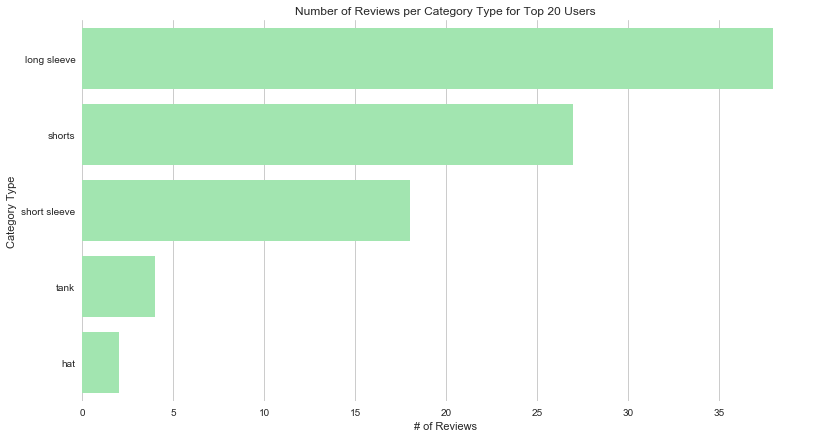

In [388]:
## sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))

# Plot the total reviews per category type
sns.set_color_codes("pastel")
sns.barplot(x = 'Total Count', y='Category Type', data=catType_top20, color="g")

# Add an informative axis label
ax.set(ylabel="Category Type", title='Number of Reviews per Category Type for Top 20 Users',
       xlabel="# of Reviews")
sns.despine(left=True, bottom=True)

### How much of sales do they make up?

In [414]:
df_top20.groupby('user')['user_rating'].agg(['mean', 'count']).reset_index().sort_values('count', ascending = False)

,user,mean,count
7,FITNAVYGUY,3.90,10
12,LOGANLEE,4.60,5
3,DAN3,3.80,5
6,ELCAPTAIN24,3.80,5
0,ANONYMOUS,4.00,4
18,THEMAN,3.00,4
17,THEANTLEREDONE,4.50,4
16,RUNTC,2.50,4
15,RUNNINGJOE,4.25,4
14,RUNNERCYCLIST,5.00,4


In [429]:
df_top20_sales=df_top20.groupby('user')['list_price'].agg(['sum']).sort_values('sum', ascending=False)
df_top20_sales

,sum
user,
FITNAVYGUY,720
DAN3,470
BRAY11,452
THEMAN,432
DILLIPE,412
ELCAPTAIN24,370
GABBYY,362
GOOMBA,352
RUNNINGJOE,332


In [430]:
df_prod_sales=df.groupby('product')['list_price'].agg(['sum']).sort_values('sum', ascending=False)
df_prod_sales

,sum
product,
Metal Vent Tech Short Sleeve,17408
Metal Vent Tech Long Sleeve,11076
"Pace Breaker Short 9""",10676
Surge Warm 1/2 Zip,8208
Metal Vent Tech Hoodie,7840
"Surge Jogger 29""",6018
"Pace Breaker Short 9"" Updated",5848
"Surge Short 7""",5100
Metal Vent Tech Long Sleeve Henley,4840


# Age Range Analysis

Text(0.5,0,'Age Range')

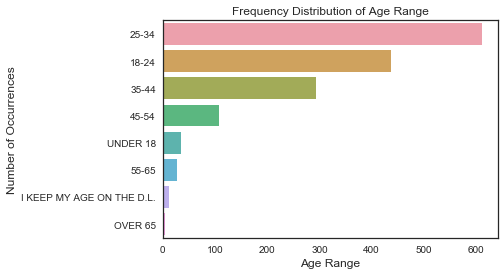

In [210]:
age_count = df['ageRange'].value_counts()
sns.set(style="white")
sns.set_color_codes("pastel")


sns.barplot(y = age_count.index, x = age_count.values, alpha=0.9)

plt.title('Frequency Distribution of Age Range')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Age Range', fontsize=12)

## Spending Habits

In [34]:
ages = df.groupby(['ageRange'])['product'].count().reset_index().sort_values(['product'], ascending = False).reset_index(drop = True)
ages
# We've got some "DL" people

,ageRange,product
0,25-34,611
1,18-24,438
2,35-44,293
3,45-54,108
4,UNDER 18,35
5,55-65,28
6,I KEEP MY AGE ON THE D.L.,12
7,OVER 65,4


# Review Text Analysis

### Create a new data frame with empty reviews removed

In [276]:
df_reviews = df.dropna(subset=['text'])

In [277]:
df_reviews['text'].isnull().sum()

0

In [278]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

## How are users talking about the products?

In [279]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color='black', stopwords=stopwords,
                          max_words=1000,
                          max_font_size=40, 
                          scale=3,
                          random_state=1).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

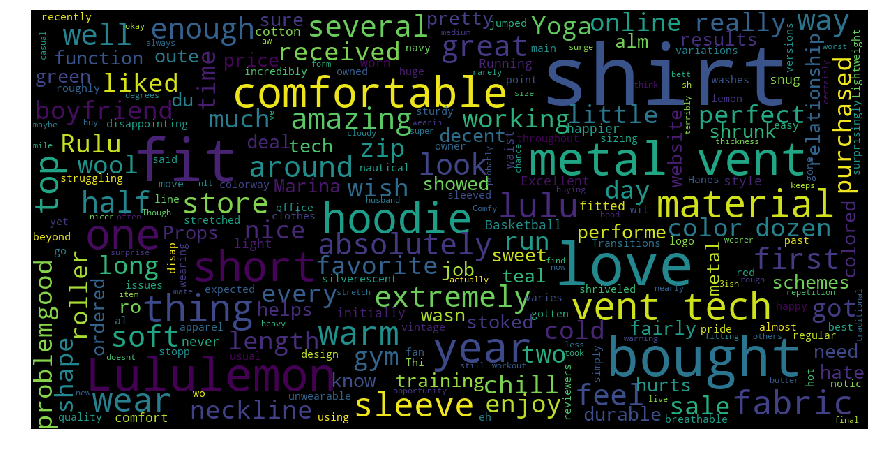

In [208]:
show_wordcloud(df_reviews['text'])

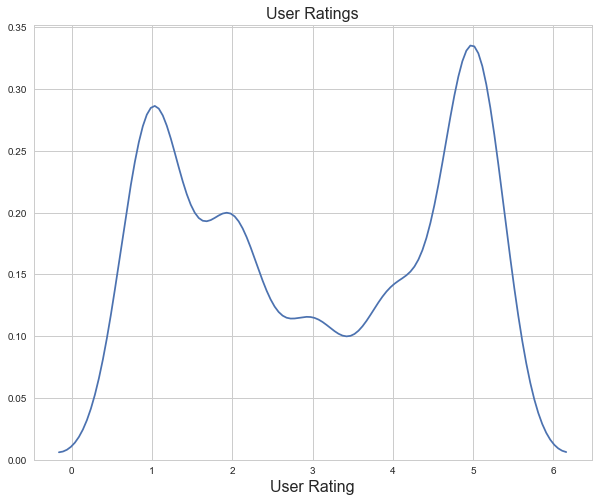

In [136]:
plt.figure(figsize=(10,8))
sns.distplot(df['user_rating'], hist = False)
plt.title("User Ratings", fontsize=16)
plt.xlabel("User Rating", fontsize=16)
plt.show();

### Does the length of a review tell anything about the ratings given?

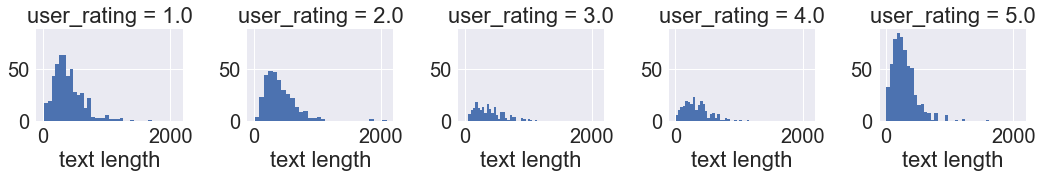

In [144]:
sns.set(font_scale=2.0)
g = sns.FacetGrid(data=df, col='user_rating')

g.map(plt.hist, 'text length', bins = 30)

Seems that ratings follow a similar distribution in review length.
There also seems to be a lower amount of 3 and 4 ratings
Mostly ratings of 5

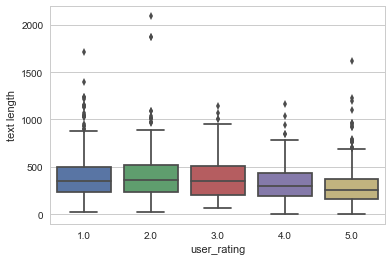

In [135]:
sns.boxplot(x='user_rating', y='text length', data=df)

## How are ratings spread through cateogry types?

In [401]:
df.groupby('product')['user_rating'].agg(['mean', 'count']).sort_values('count', ascending = False).head(20)

,mean,count
product,,
Metal Vent Tech Short Sleeve,2.664062,256
"Pace Breaker Short 9""",2.878981,157
Metal Vent Tech Long Sleeve,3.605634,142
"Pace Breaker Short 9"" Updated",1.837209,86
Metal Vent Tech Hoodie,2.125000,80
Surge Warm 1/2 Zip,2.973684,76
"Surge Short 7""",3.306667,75
Metal Vent Tech Tank,2.972603,73
Purist Cycling Water Bottle 26 oz,2.967213,61


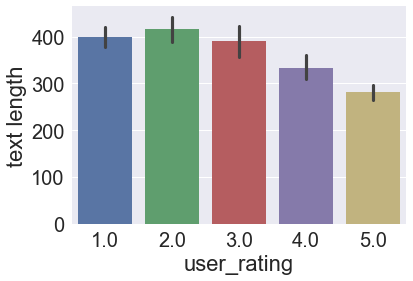

In [185]:
sns.barplot(x="user_rating", y="text length", data=df)


In [180]:
df.groupby('product')['user_rating'].agg(['mean', 'count']).sort_values('mean', ascending = False).tail(20)

,mean,count
product,,
Purist Cycling Water Bottle 26 oz,2.967213,61
"Pace Breaker Short 9""",2.878981,157
"Surge Jogger 29""",2.823529,51
"T.H.E. Short 9"" Updated",2.800000,40
"Surge Light 3/4 Tight Side Pockets 23""",2.800000,10
"Surge Short 6"" Updated",2.750000,40
Metal Vent Tech Short Sleeve,2.664062,256
"Surge Short Light 7""",2.631579,19
Surge Sock,2.600000,10


In [141]:
import string
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

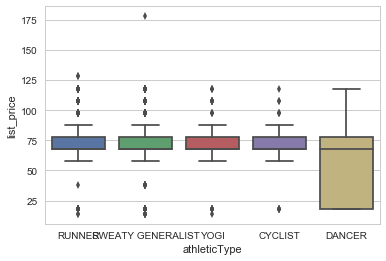

In [282]:
sns.boxplot(x="athleticType", y="list_price", data=df);


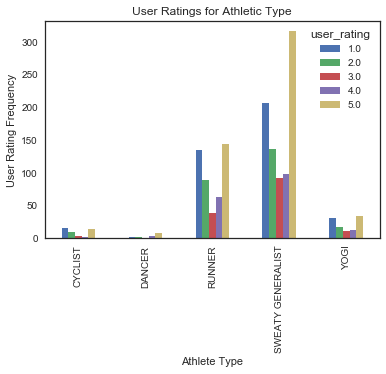

In [205]:
pd.crosstab(df.athleticType, df.user_rating).plot(kind='bar')
plt.title('User Ratings for Athletic Type')
plt.xlabel('Athlete Type')
plt.ylabel('User Rating Frequency')
plt.savefig('user_rating_fre_athType')

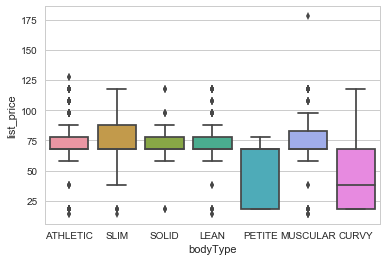

In [283]:
sns.boxplot(x="bodyType", y="list_price", data=df);


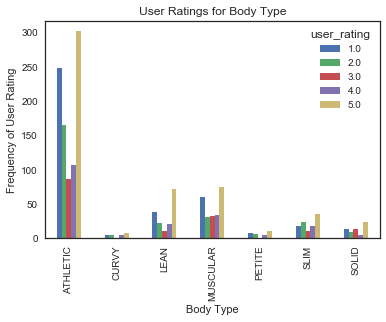

In [206]:

pd.crosstab(df.bodyType, df.user_rating).plot(kind='bar')
plt.title('User Ratings for Body Type')
plt.xlabel('Body Type')
plt.ylabel('Frequency of User Rating')
plt.savefig('user_rating_fre_bodyType')

Text(0,0.5,'Proportion of Body Types')

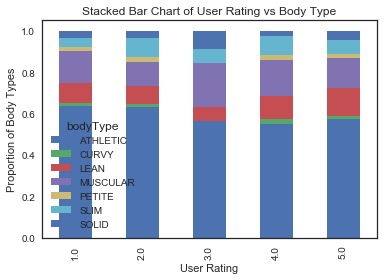

In [203]:
table=pd.crosstab(df.user_rating,df.bodyType)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of User Rating vs Body Type')
plt.xlabel('User Rating')
plt.ylabel('Proportion of Body Types')

# Does month/year make an impact on ratings?

In [214]:
df['datePublished'] = pd.to_datetime(df['datePublished'], infer_datetime_format=True)
df['responseDate'] = pd.to_datetime(df['responseDate'], infer_datetime_format=True)

In [216]:
df['year'], df['month'] = df['datePublished'].dt.year, df['datePublished'].dt.month

In [232]:
year_counts = df.groupby('year')['product'].count().reset_index()
year_counts = year_counts.rename(columns={'year':'Year', 'product':'Total Responses'})
year_counts

,Year,Total Responses
0,2010,3
1,2011,8
2,2012,21
3,2013,32
4,2014,93
5,2015,148
6,2016,306
7,2017,505
8,2018,699


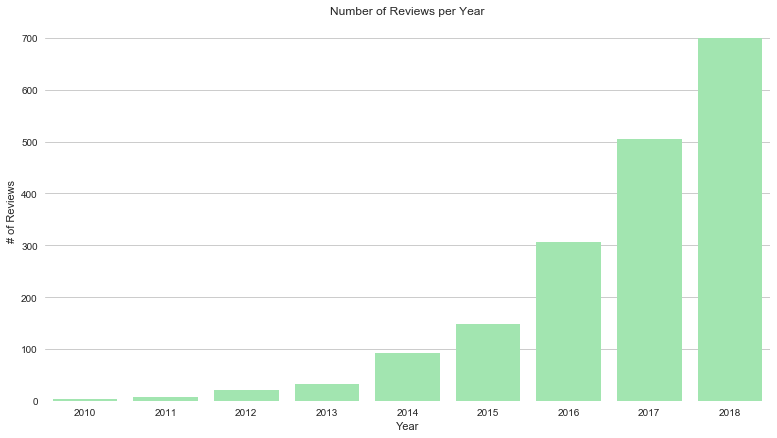

In [233]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))

# Plot the total reviews per category type
sns.set_color_codes("pastel")
sns.barplot(x = 'Year', y='Total Responses', data=year_counts, color="g")

# Add an informative axis label
ax.set(ylabel="# of Reviews", title='Number of Reviews per Year',
       xlabel="Year")
sns.despine(left=True, bottom=True)

In [235]:
month_counts = df.groupby('month')['product'].count().reset_index()
month_counts = month_counts.rename(columns={'month':'Month', 'product':'Total Responses'})
month_counts

,Month,Total Responses
0,1,135
1,2,110
2,3,124
3,4,127
4,5,148
5,6,174
6,7,318
7,8,229
8,9,118
9,10,115


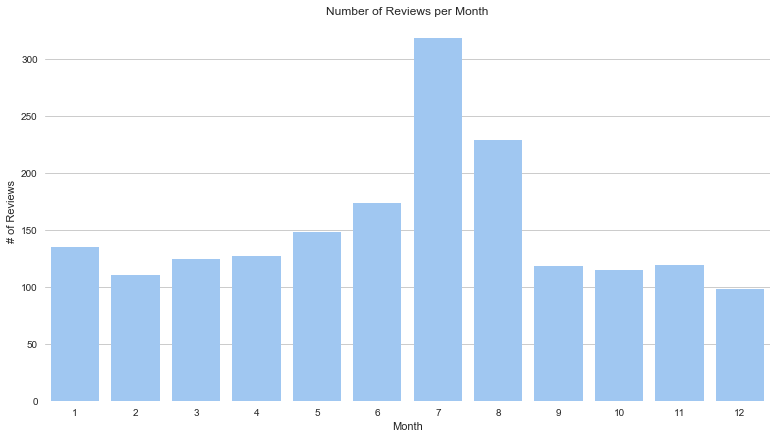

In [236]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))

# Plot the total reviews per category type
sns.set_color_codes("pastel")
sns.barplot(x = 'Month', y='Total Responses', data=month_counts, color="b")

# Add an informative axis label
ax.set(ylabel="# of Reviews", title='Number of Reviews per Month',
       xlabel="Month")
sns.despine(left=True, bottom=True)

In [254]:
ratings_year = df.groupby(['year', 'user_rating'])['product'].count().reset_index()
ratings_year

,year,user_rating,product
0,2010,3.0,1
1,2010,5.0,2
2,2011,3.0,2
3,2011,4.0,2
4,2011,5.0,4
5,2012,1.0,2
6,2012,2.0,1
7,2012,4.0,1
8,2012,5.0,17
9,2013,1.0,1
